# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Importing Dataset

In [2]:
df =  pd.read_csv(r"C:\Users\Asus-pc\selu shit\Projects\Christmas Movies\christmas_movies.csv")
df.head(5)

,title,rating,runtime,imdb_rating,meta_score,genre,release_year,description,director,stars,votes,gross,img_src,type
0,Love Actually,R,135.0,7.6,55.0,"Comedy, Drama, Romance",2003.0,Follows the lives of eight very different coup...,Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...","491,920",$59.70M,https://m.media-amazon.com/images/M/MV5BMTY4Nj...,Movie
1,National Lampoon's Christmas Vacation,PG-13,97.0,7.5,49.0,Comedy,1989.0,The Griswold family's plans for a big family C...,Jeremiah S. Chechik,"Chevy Chase, Beverly D'Angelo, Juliette Lewis,...","198,428",$71.32M,https://m.media-amazon.com/images/M/MV5BMGZkMW...,Movie
2,Spirited,PG-13,127.0,6.6,55.0,"Comedy, Family, Musical",2022.0,A musical version of Charles Dickens's story o...,Sean Anders,"Will Ferrell, Ryan Reynolds, Octavia Spencer, ...","34,304",NaN,https://m.media-amazon.com/images/M/MV5BY2RlZG...,Movie
3,Home Alone,PG,103.0,7.7,63.0,"Comedy, Family",1990.0,"An eight-year-old troublemaker, mistakenly lef...",Chris Columbus,"Macaulay Culkin, Joe Pesci, Daniel Stern, John...","584,210",$285.76M,https://m.media-amazon.com/images/M/MV5BMzFkM2...,Movie
4,How the Grinch Stole Christmas,PG,104.0,6.3,46.0,"Comedy, Family, Fantasy",2000.0,"On the outskirts of Whoville lives a green, re...",Ron Howard,"Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tam...","259,796",$260.04M,https://m.media-amazon.com/images/M/MV5BNWNiNT...,Movie


In [3]:
print("No of Rows:" , df.shape[0])
print("No of Columns:"  , df.shape[1])

No of Rows: 788
No of Columns: 14


In [4]:
#duplication in the data
df.duplicated().sum()

0

#  😵Processing

In [5]:
#datatype of each columns
df.dtypes


title            object
rating           object
runtime         float64
imdb_rating     float64
meta_score      float64
genre            object
release_year    float64
description      object
director         object
stars            object
votes            object
gross            object
img_src          object
type             object
dtype: object

### Issue!
Released year and votes should be of numeric datataype

In [6]:
df["release_year"] =  df["release_year"].astype("Int64")


In [7]:
df["votes"] =  df["votes"].str.replace("," , "")
df["votes"]  = df["votes"].astype("float")
df["votes"]  = df["votes"].astype("Int64")

In [22]:
#types of ratings 
Ratings  =  df["rating"].unique()
Ratings

array(['R', 'PG-13', 'PG', 'Not Rated', 'G', 'TV-G', 'TV-PG', nan,
       'TV-MA', 'Passed', 'Approved', '6', 'AL', 'TV-14', '7+', 'TV-Y'],
      dtype=object)

### <b>Issue!</b>
</br>
Why there are two types of rating namely "No rated" and "Unrated", they are technically the same thing?
</br>
let's explore it further

In [ ]:
#types of movies 
for i in range(len(df)):
    if df["rating"].iloc[i] == "Unrated":
        print(df.iloc[i])

Above 5 rows contain "Unrated" rating which can easily be converted into "Not Rated"
</br>
</br>
I couldn't find the clear distinction or similarity  between ratings "Approved" , "Passed" so I'll leave them as they are.

In [ ]:
for i in range(len(df)):
    if df["rating"].iloc[i] == "Unrated":
        df["rating"].iloc[i] = "Not Rated"

#checking to see if that  worked 
df.rating.unique()

In [ ]:
#Dealing with the gross column 

#1. creating an extra column "Earnings" without dollar sign and M(Miliion)
df['Earnings']=  df['gross'].str.replace("$" , "")
df['Earnings']  = df['Earnings'].str.replace("M", "")

#2. Converting earnings to float datatype

df['Earnings'] = df['Earnings'].astype("float")

#3. Multiplying each by a million since sthey were originally in million
df['Earnings']  =  1000000*df['Earnings']


In [12]:
#Listings all the unique genres

#1.Removing whitespaces to not cause any duplication
df['genre'] =  df['genre'].str.replace(" ", "")

#2.combining in a single array
unique_genre = pd.unique(df['genre'].str.split("," ,expand =  True).stack())
unique_genre

array(['Comedy', 'Drama', 'Romance', 'Family', 'Musical', 'Fantasy',
       'Adventure', 'Action', 'Thriller', 'Animation', 'Crime', 'Horror',
       'Mystery', 'Music', 'Sci-Fi', 'Biography', 'Short', 'Sport',
       'Western', 'Film-Noir', 'History', 'War', 'Documentary', 'News',
       'Talk-Show', 'Game-Show'], dtype=object)

In [13]:
#Droppings columns that are not necessary for our analysis 
df  = df.drop(columns  = ['description' , 'img_src', 'meta_score'])


# Analysis


 ## 🔝  Top 10 movies by imbd ratings

In [14]:
#Listing top 10 movies by their IMDB ratings
top_movies  =  df.sort_values("imdb_rating" ,  ascending  =  False)
top_movies[['title' , 'imdb_rating' , 'release_year']].head(10)

,title,imdb_rating,release_year
777,It's Always Sunny in Philadelphia: A Very Sunn...,9.2,2005
772,ABC Stage 67: A Christmas Memory,8.9,1966
6,It's a Wonderful Life,8.6,1946
732,A Kylie Christmas: Live from the Royal Albert ...,8.5,2015
217,Anne of Green Gables,8.5,1985
376,Christmas Eve on Sesame Street,8.4,1978
699,The Original Christmas Classics,8.4,1965
64,A Charlie Brown Christmas,8.3,1965
86,The Apartment,8.3,1960
39,How the Grinch Stole Christmas!,8.3,1966


## 💲💲 Top grossing movies

In [15]:
# Listing top 10 movies by earnings 
top_gross =  df.sort_values("Earnings" ,  ascending   =  False).reset_index()
top_gross[['title' , "gross" , "imdb_rating" , "Earnings"]].head(10)

,title,gross,imdb_rating,Earnings
0,Iron Man 3,$409.01M,7.1,409010000.0
1,Home Alone,$285.76M,7.7,285760000.0
2,The Grinch,$270.62M,6.3,270620000.0
3,How the Grinch Stole Christmas,$260.04M,6.3,260040000.0
4,The Polar Express,$183.37M,6.6,183370000.0
5,Home Alone 2: Lost in New York,$173.59M,6.8,173590000.0
6,Elf,$173.40M,7.1,173400000.0
7,The Santa Clause,$144.83M,6.5,144830000.0
8,Shazam!,$140.37M,7.0,140370000.0
9,The Santa Clause 2,$139.24M,5.7,139240000.0


## 📊 Movies by years

In [16]:
#Number of christmas movies produced each year
movies_by_year  =  df.groupby('release_year')['title'].count().to_frame(name = "Number_of_Christmas_Movies").reset_index()
movies_by_year.sort_values('Number_of_Christmas_Movies' , ascending  =  False).head(10)

,release_year,Number_of_Christmas_Movies
76,2020,92
75,2019,73
74,2018,70
77,2021,65
73,2017,48
71,2015,39
72,2016,39
78,2022,38
70,2014,30
68,2012,29


##  😂😥👪 🌹Popular Genres

In [17]:
#Measuring the  popularity of a genre by counting its occurence 
df['genre'] =  df['genre'].str.replace(" ", "")
unique_genre = df['genre'].str.split("," ,expand =  True).stack()
unique_genre.value_counts().to_frame(name = "Occurence").reset_index()


,index,Occurence
0,Comedy,452
1,Drama,414
2,Romance,385
3,Family,282
4,Fantasy,91
5,Adventure,47
6,Animation,46
7,Short,27
8,Music,27
9,Musical,24


## 📊High imdb_rating === > High Earning  🤑 ?

Text(0.5, 0, 'Earnings')

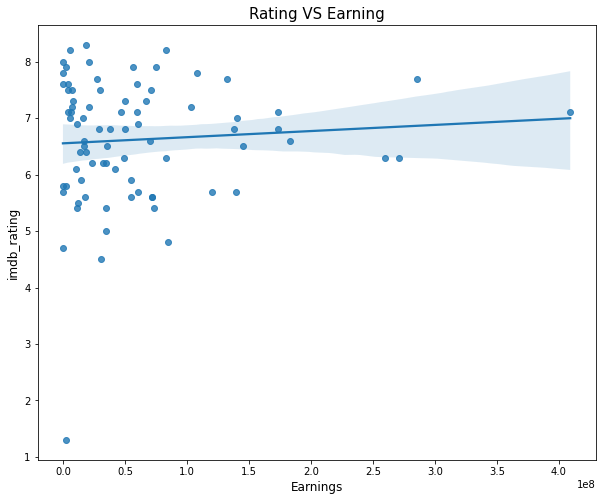

In [18]:
plt.figure(figsize = (10,8))
sns.regplot(data  =  df ,  y = "imdb_rating" , x =  "Earnings")
plt.title("Rating VS Earning" , fontsize = 15)
plt.ylabel("imdb_rating" , fontsize = 12)
plt.xlabel("Earnings" ,  fontsize =  12)

## ⏳ Runtime over years

Text(0.5, 1.0, 'Rutime over Years')

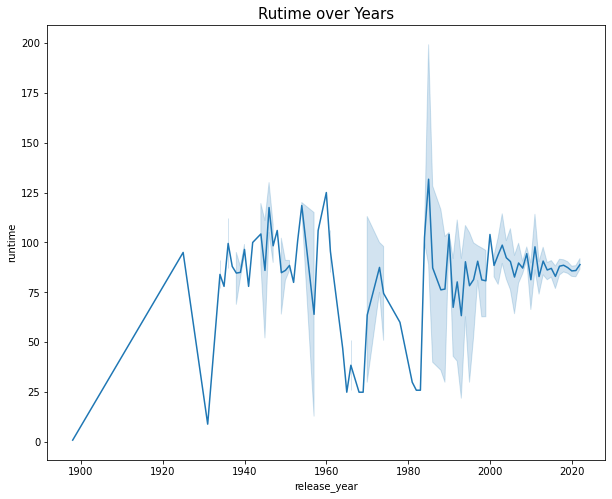

In [19]:
plt.figure(figsize = (10,8))
sns.lineplot(data  = df , x = "release_year" ,y = "runtime")
plt.title("Rutime over Years" , fontsize = 15)


##  Most common ratings 

<AxesSubplot:xlabel='rating', ylabel='count'>

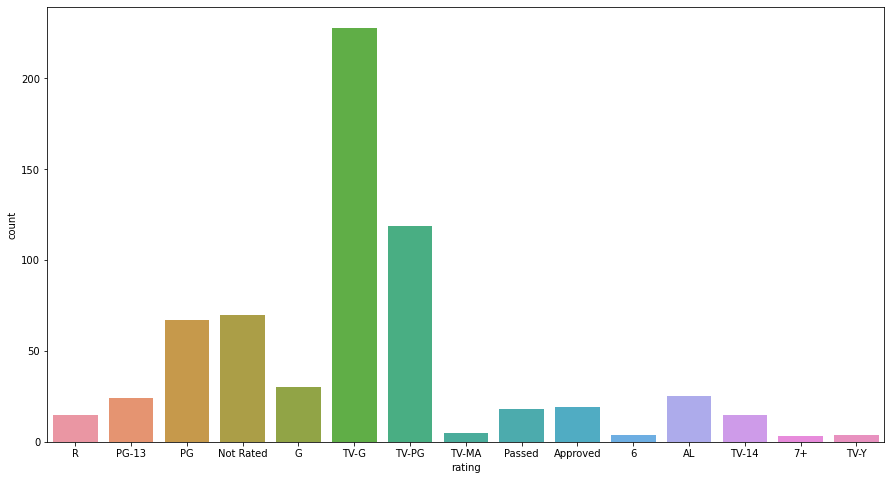

In [20]:
plt.figure(figsize = (15,8))
sns.countplot(data = df , x = 'rating')

In [21]:
#Movie or TV show 
df.type.value_counts()

Movie         775
TV Episode     13
Name: type, dtype: int64